# Simulation 1.1 - Analyzing the agents


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent as agn

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

exploration_train = 0.1
exploration_test = 0
learningrate = 0.1
discount = 0.9
max_steps = 1000

flag_reward = 10
query_reward = -1

## Loading the statistics

In [3]:
train_data = joblib.load('ignore_simul1_traindata_20210217232217657942.pkl')
test_data = joblib.load('ignore_simul1_testdata_20210217232217657942.pkl')

## Analyzing the agent

### Training: number of states

Plotting the evolution in the number of states (average and standard deviation over 10 repetitions).

Text(0, 0.5, 'number of states')

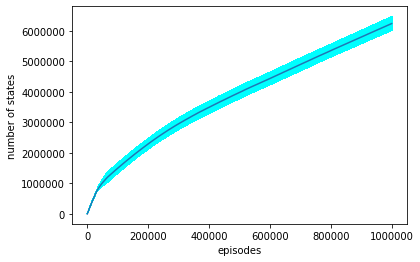

In [4]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,2,:],axis=0),yerr=np.std(train_data[:,2,:],axis=0),ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of states')

### Training: number of steps

We first plot the number of steps (average and standard deviation over 10 repetitions)

Text(0, 0.5, 'number of steps')

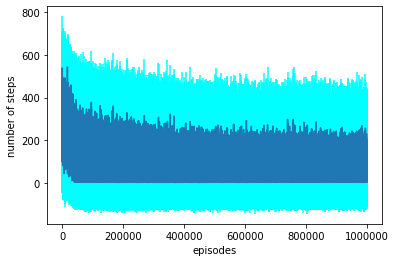

In [5]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,0,:],axis=0),yerr=np.std(train_data[:,0,:],axis=0),ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of steps')

We then smooth with a $1000$-step window each repetition, then we compute mean and standard deviation in number of steps.

Text(0, 0.5, 'number of steps')

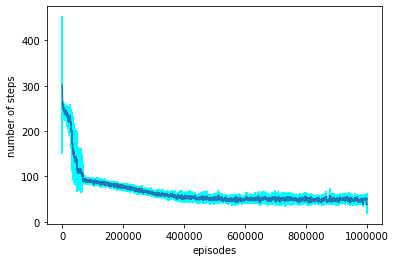

In [6]:
mean_smmothed = np.mean(uniform_filter1d(train_data[:,0,:],axis=1,size=1000,mode='nearest'),axis=0)
std_smmothed = np.std(uniform_filter1d(train_data[:,0,:],axis=1,size=1000,mode='nearest'),axis=0)

plt.errorbar(range(n_episodes_training),mean_smmothed,yerr=std_smmothed,ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of steps')

Alternatively we can first average and then smooth (although smoothing the standard deviation does not make much sense).

Text(0, 0.5, 'number of steps')

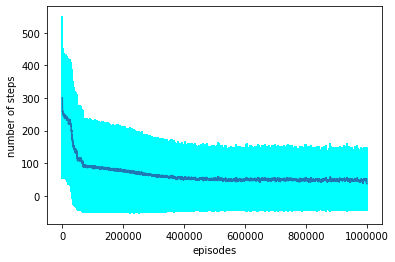

In [7]:
smoothed_mean = uniform_filter1d(np.mean(train_data[:,0,:],axis=0),size=1000,mode='nearest')
smoothed_std = uniform_filter1d(np.std(train_data[:,0,:],axis=0),size=1000,mode='nearest')

plt.errorbar(range(n_episodes_training),smoothed_mean,yerr=smoothed_std,ecolor='cyan')
plt.xlabel('episodes')
plt.ylabel('number of steps')

### Test: number of steps

We first plot the number of steps (average and standard deviation over 10 repetitions)

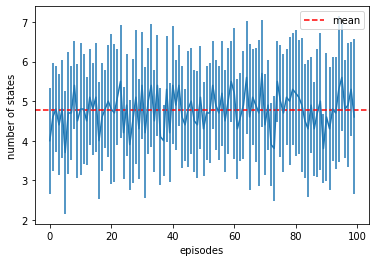

In [8]:
plt.errorbar(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0),yerr=np.std(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.legend()